In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
traffic_df = pd.read_excel('../data/oppia-traffic-by-country.xlsx', sheet_name = 'Country Traffic', skiprows = 14)
traffic_df = traffic_df.iloc[1:, 0:8] # Skip (not set) value in Country col
traffic_df.sample(3)


,Country,Users,Sessions,Bounces,Avg. Session Duration,Avg. Page Load Time (sec),Page Load Sample,Goal Completions
164,Serbia,123,143,61,74.048951,1.51275,20,138
61,Eswatini,7,10,1,94.300000,0.00000,0,15
77,Guadeloupe,7,10,1,230.400000,0.00000,0,18


In [22]:
print('Oppia traffic data has {} countries'.format(len(traffic_df)))

Oppia traffic data has 214 countries


In [23]:
lang_edu_df = pd.read_csv('../data/lang_edu_df.csv')
lang_df = lang_edu_df.iloc[:, 8:]
lang_df.sample(3)

,country,income_group,econ_region,geo_region,cluster,English,Spanish,French,Portuguese,Chinese,Hindi,Arabic,english_popular
58,Jamaica,Upper middle income,Latin America and the Caribbean,Latin America and the Caribbean,Mid,True,False,False,False,False,False,False,True
75,Morocco,Lower middle income,"Middle East, North Africa, and Pakistan",Middle East and North Africa,Mid,False,False,True,False,False,False,True,False
80,Montenegro,Upper middle income,Emerging and Developing Europe,Europe and North America,Mid,False,False,False,False,False,False,False,False


In [24]:
print('Language data has {} countries'.format(len(lang_df)))

Language data has 134 countries


# Fix country names mismatch

In [25]:
traffic_country = list(traffic_df.Country)
lang_country = list(lang_df.country)

# Find what countries having names listed differently
mismatch = []
for country in lang_country:
    if country not in traffic_country:
        mismatch.append(country)
mismatch

['Bosnia and Herzegovina',
 'Brunei Darussalam',
 'Congo, Democratic Rep.',
 'Cape Verde',
 'Czech Republic',
 'Gambia, The',
 'Hong Kong SAR',
 'Iran, Islamic Rep.',
 'Kyrgyz Republic',
 'Korea, Rep.',
 'Lao PDR',
 'Russian Federation',
 'Swaziland',
 'Chad',
 'Trinidad and Tobago',
 'Taiwan, China',
 'Viet Nam']

In [26]:
change_country_name = {'Brunei Darussalam':'Brunei' , 
                        'Cabo Verde': 'Cape Verde', 
                         'Congo, Democratic Rep.': 'Congo - Kinshasa',
                       'Czech Republic': 'Czechia', 
                         'Hong Kong SAR':'Hong Kong', 
                         'Iran, Islamic Rep.':'Iran',
                        'Korea, Rep.':'South Korea', 
                         'Kyrgyz Republic':'Kyrgyzstan', 
                         'Lao PDR':'Laos', 
                         'Russian Federation':'Russia',
                        'Swaziland':'Eswatini', 
                         'Taiwan, China':'Taiwan', 
                         'Viet Nam': 'Vietnam',
                          'Gambia, The': 'Gambia',
                      'Bosnia and Herzegovina':'Bosnia & Herzegovina',
                      'Trinidad and Tobago': 'Trinidad & Tobago'} 

# Change country names 
lang_df.country.replace(change_country_name, inplace = True)

In [27]:
traffic_country = list(traffic_df.Country)
lang_country = list(lang_df.country)

mismatch = []
for country in lang_country:
    if country not in traffic_country:
        mismatch.append(country)
print('There are 2 countries in the language/cluster data set but not in the Oppia traffic dataset. \
Maybe because we have no traffic from these 2 countries: {}'.format(mismatch))

There are 2 countries in the language/cluster data set but not in the Oppia traffic dataset. Maybe because we have no traffic from these 2 countries: ['Cape Verde', 'Chad']


In [28]:
# Find countries in the Opppia traffic dataset but not in language data
excluded_country = []
for country in traffic_country:
    if country not in lang_country:
        excluded_country.append(country)
print('There are {} countries excluded in the language/education dataset due to lack of data in CGI dataset. They are: {}'.\
      format(len(excluded_country), excluded_country))

There are 82 countries excluded in the language/education dataset due to lack of data in CGI dataset. They are: ['Afghanistan', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua & Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'British Virgin Islands', 'Burkina Faso', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Congo - Brazzaville', 'Cook Islands', 'Côte d’Ivoire', 'Cuba', 'Curaçao', 'Djibouti', 'Dominica', 'Faroe Islands', 'Fiji', 'French Guiana', 'French Polynesia', 'Gabon', 'Gibraltar', 'Grenada', 'Guadeloupe', 'Guam', 'Guernsey', 'Guyana', 'Haiti', 'Iraq', 'Jersey', 'Kiribati', 'Kosovo', 'Libya', 'Liechtenstein', 'Macao', 'Madagascar', 'Maldives', 'Marshall Islands', 'Martinique', 'Micronesia', 'Monaco', 'Myanmar (Burma)', 'New Caledonia', 'North Macedonia', 'Northern Mariana Islands', 'Palau', 'Palestine', 'Papua New Guinea', 'Puerto Rico', 'Réunion', 'Samoa', 'Sint Maarten', 'Slovakia', 'Solomon Islands',

# Join data

In [29]:
#Join traffic and lang/edu df
joined_df = lang_df.merge(traffic_df, how = 'left', left_on = 'country', right_on = 'Country')\
            .drop(['Country'], axis = 1)
joined_df.sample(3)

,country,income_group,econ_region,geo_region,cluster,English,Spanish,French,Portuguese,Chinese,Hindi,Arabic,english_popular,Users,Sessions,Bounces,Avg. Session Duration,Avg. Page Load Time (sec),Page Load Sample,Goal Completions
22,Cameroon,Lower middle income,Sub-Saharan Africa,Sub-Saharan Africa,Low,True,False,True,False,False,False,False,False,77.0,115.0,43.0,273.817391,0.00000,0.0,128.0
71,Lesotho,Lower middle income,Sub-Saharan Africa,Sub-Saharan Africa,Low,True,False,False,False,False,False,False,False,7.0,8.0,6.0,9.625000,0.00000,0.0,2.0
88,Nigeria,Lower middle income,Sub-Saharan Africa,Sub-Saharan Africa,Low,True,False,False,False,False,False,False,True,1486.0,2089.0,870.0,225.396841,18.74715,20.0,2090.0


In [30]:
target_countries = joined_df[joined_df['cluster'] == 'Mid']

target_eng_popular = target_countries[target_countries.english_popular == True].country.unique()
target_eng = target_countries[target_countries.English == True].country.unique()

In [32]:
# Create column to identified if this country has any page load sample
index_page_sampled = joined_df[joined_df['Page Load Sample'] == 0].index

joined_df['page_sample_tf'] = False
joined_df.loc[index_page_sampled, 'page_sample_tf'] = True

In [34]:
joined_df.to_csv('../output/lang_edu_traffic.csv', index = False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


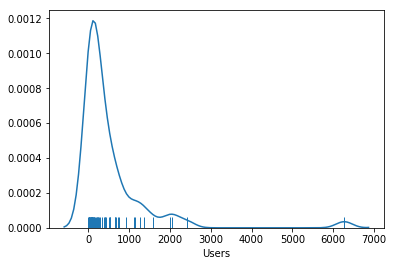

In [146]:
sns.distplot(joined_df[joined_df.cluster == "Mid"]['Users'], hist=False, rug=True)

In [16]:
joined_df.groupby('cluster').describe()

Users                                                                  \
        count         mean          std   min    25%    50%      75%      max   
cluster                                                                         
High     35.0  2429.800000  7383.487323  19.0  187.0  335.0  1195.00  38759.0   
Low      40.0   730.450000  2620.530950   1.0   13.0   69.5   194.25  16169.0   
Mid      57.0   540.508772   951.242949   6.0   80.0  204.0   648.00   6270.0   

        Sessions               ... Page Load Sample        Goal Completions  \
           count         mean  ...              75%    max            count   
cluster                        ...                                            
High        35.0  3810.771429  ...            19.50  965.0             35.0   
Low         40.0  1106.400000  ...             5.25  589.0             40.0   
Mid         57.0   809.842105  ...            16.00  191.0             57.0   

                                                                          
                mean           std   min     25%    50%     75%      max  
cluster                                                                   
High     5505.342857  16440.096223  27.0  275.00  582.0  2053.0  87106.0  
Low      1377.800000   5117.636114   0.0   22.75  103.0   372.0  31843.0  
Mid      1028.719298   1525.871610   3.0  113.00  343.0  1066.0   7378.0  

[3 rows x 56 columns]